In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import local_config

df = pd.read_csv(f'{local_config.DATA_DIR}/angle_testing/all_simulations_wrongxy.csv')

targ = 'x'

plt.scatter(df[f"Strain Rate {targ}"], df[f"Sigma_{targ}"], alpha=0.1, s=10)
plt.xlabel(f"Strain Rate {targ}")
plt.ylabel(f"Sigma {targ}")
plt.title(f"Strain vs stress ({targ})")
plt.show()


DP Parameters in $(\alpha, k)$ space

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("drucker_prager_params.csv")

plt.figure(figsize=(8, 8))

plt.scatter(df["alpha"], df["k"], color='black', s=20, alpha=0.2)
plt.xlabel(r"$\alpha$", fontsize=18)
plt.ylabel(r"$k$", fontsize=18)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Fit Drucker-Prager parameters for 1000 samples", fontsize=20)
plt.tight_layout()


DP Parameters in $\sigma_{ts}, \sigma_{cs}$ space

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("drucker_prager_params.csv")

plt.figure(figsize=(8, 8))

cs = (3 * df["k"]) / (np.sqrt(3) - 3 * df["alpha"])
ts = (3 * df["k"]) / (np.sqrt(3) + 3 * df["alpha"])
bs = (3 * df["k"]) / (np.sqrt(3) + 6 * df["alpha"])


plt.scatter(ts, cs, color='red', s=20, alpha=0.2, label='Compressive')
plt.scatter(ts, bs, color='blue', s=20, alpha=0.2, label='Biaxial Tensile')
plt.xlabel(r"Uniaxial Tensile Strength (GPa)", fontsize=18)
plt.ylabel(r"Compressive or Biaxial Tensile Strength(GPa)", fontsize=18)

plt.xlim(20, 130)
plt.ylim(20, 130)

plt.legend(fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Uniaxial Tensile, Compressive, and Biaxial Tensile Strengths", fontsize=20)
plt.tight_layout()

Probing the DP Parameter constraints

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define ranges for σ_cs and σ_ts
sigma_cs = np.linspace(1, 100, 500)
sigma_ts = np.linspace(1, 100, 500)

# Create meshgrid
BS, TS = np.meshgrid(sigma_cs, sigma_ts)

# Compute alpha
# alpha = (CS - TS) / (np.sqrt(3) * (CS + TS))
alpha = (TS - BS) / (np.sqrt(3) * (2 * BS - TS))


# Plot
plt.figure(figsize=(8, 6))
c = plt.pcolormesh(BS, TS, alpha, shading='auto', cmap='viridis')
plt.colorbar(c, label=r'$\alpha$')

plt.xlabel(r'$\sigma_{bs}$')
plt.ylabel(r'$\sigma_{ts}$')
# plt.title(r'$\alpha = \frac{\sigma_{cs} - \sigma_{ts}}{\sqrt{3} (\sigma_{cs} + \sigma_{ts})}$')
plt.title(r'$\alpha = \frac{\sigma_{ts} - \sigma_{bs}}{\sqrt{3} (2\sigma_{bs} - \sigma_{ts})}$')

plt.tight_layout()
plt.show()


$\alpha$ and $k$ as a function of $\theta$

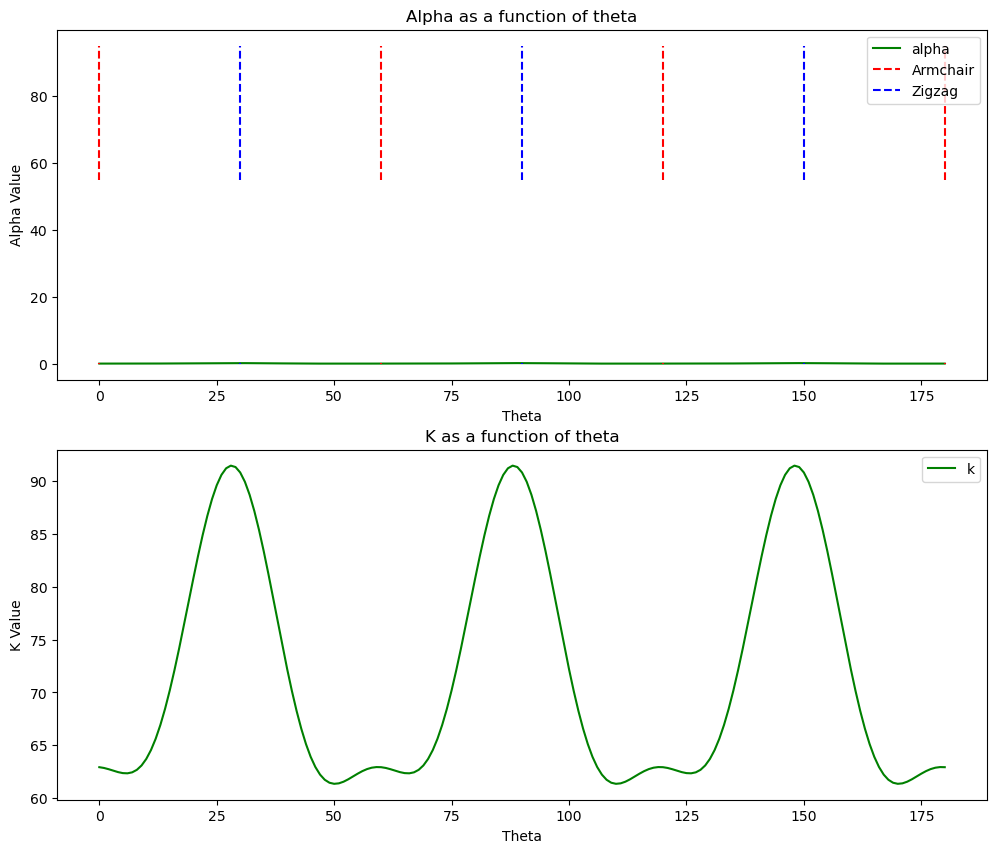

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("drucker_prager_params_thetas3D.csv")
def omega(theta):
    return 2 * np.pi * theta / 60

def alpha(theta):
    om = omega(theta)

    # First + second harmonics for alpha and k
    val = (
        df["a0"]
        + df["a1"] * np.cos(om)
        + df["a2"] * np.sin(om)
        + df["a3"] * np.cos(2 * om)
        + df["a4"] * np.sin(2 * om)
    )
    return val

def k(theta):
    om = omega(theta)

    # First + second harmonics for alpha and k
    val = (
        df["k0"]
        + df["k1"] * np.cos(om)
        + df["k2"] * np.sin(om)
        + df["k3"] * np.cos(2 * om)
        + df["k4"] * np.sin(2 * om)
    )
    return val

thetas = np.arange(0, 181, 1)
alphas = []
ks = []
for i in range(len(thetas)):
    alphas.append(alpha(i))
    ks.append(k(i))

fig, axs = plt.subplots(2, 1, figsize=(12, 10))

axs[0].plot(thetas, alphas, color='green', label='alpha')
axs[0].plot([0, 0], [0, 0.22], '--', color='red', label='Armchair')
axs[0].plot([60, 60], [0, 0.22], '--', color='red')
axs[0].plot([120, 120], [0, 0.22], '--', color='red')
axs[0].plot([180, 180], [0, 0.22], '--', color='red')
axs[0].plot([30, 30], [0, 0.22], '--', color='blue', label='Zigzag')
axs[0].plot([90, 90], [0, 0.22], '--', color='blue')
axs[0].plot([150, 150], [0, 0.22], '--', color='blue')
axs[0].set_xlabel("Theta")
axs[0].set_ylabel("Alpha Value")
axs[0].set_title("Alpha as a function of theta")
axs[0].legend()

axs[1].plot(thetas, ks, color='green', label='k')
axs[1].plot([0, 0], [55, 95], '--', color='red', label='Armchair')
axs[1].plot([60, 60], [55, 95], '--', color='red')
axs[1].plot([120, 120], [55, 95], '--', color='red')
axs[1].plot([180, 180], [55, 95], '--', color='red')
axs[1].plot([30, 30], [55, 95], '--', color='blue', label='Zigzag')
axs[1].plot([90, 90], [55, 95], '--', color='blue')
axs[1].plot([150, 150], [55, 95], '--', color='blue')
axs[1].set_xlabel("Theta")
axs[1].set_ylabel("K Value")
axs[1].set_title("K as a function of theta")
axs[1].legend()

plt.show()